### + Folder Load gồm 3 file chính:
- ".env": Lưu trữ các environment variables (biến môi trường).
- "mongoload.py": Thao tác với dữ liệu nhận được sau khi xử lý của file "process.py", thao tác ở đây cụ thể là thêm (insertion).
- "settings.py": Lấy ra các giá trị các biến từ file ".env".

### + Folder này chính là phần "Data Uploader" trong ảnh dưới:
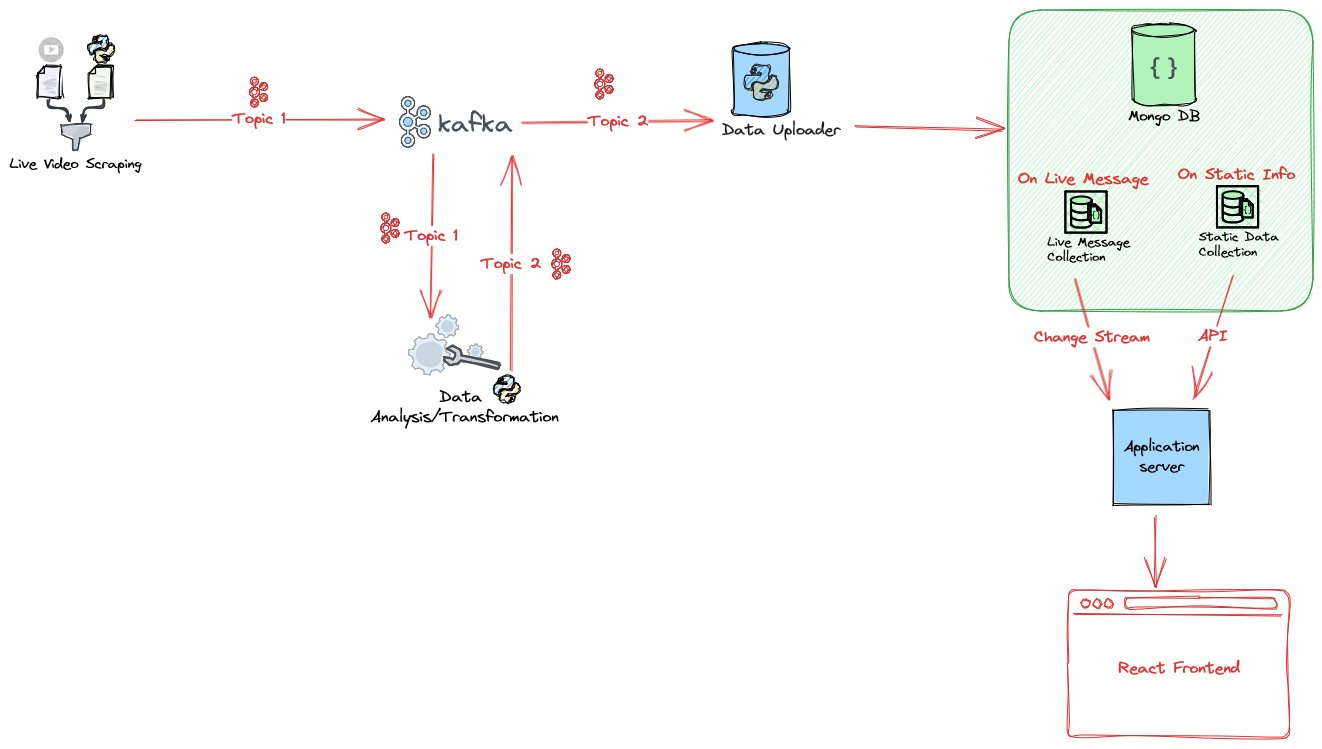

### + .env
- Gồm 3 biến:
    + KAFKA_SERVER: Địa chỉ để connect tới kafka server.
    + LOAD_CONSUME_TOPIC: Tên consumer topic của kafka.
    + MONGO_DB_URL: Địa chỉ kết nối đến CỤM (cluster) server mongodb.

    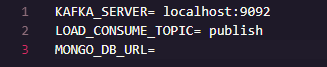

### + settings.py
- Lấy ra giá trị các biến được khai báo trong file .env và lưu trữ các giá trị đó vào các biến python.

    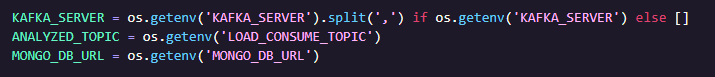

### + mongoload.py
- class MongoLoader: connect với CỤM server mongodb, và thực hiện việc thêm dữ liệu vào database
- class này gồm những thuộc tính chính sau:
    - server: URL để kết nối đến kafka server
    - client: tạo ra một đối tượng kết nối đến cụm máy chủ mongodb.
    - db: Lấy hoặc tạo ra database có tên là "main". <br>

- class này gồm những hàm chính sau:
    - receive_upstream(self): Lấy ra các raw message ở dạng bytes từ consumer topic. <br>
    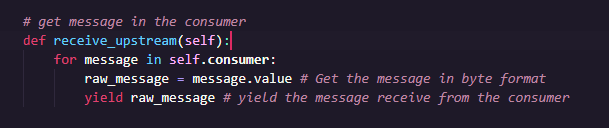
    
    - push_to_db(self, json_msg, collection_name): Thêm dữ liệu vào trong collection, cụ thể là thêm json_msg.
        - Trong đó: 
            - json_msg là raw message nhận được từ kafka server và được parse ra định dạng JSON.
            - collection_name: tên của collection cần thêm dữ liệu.
            
        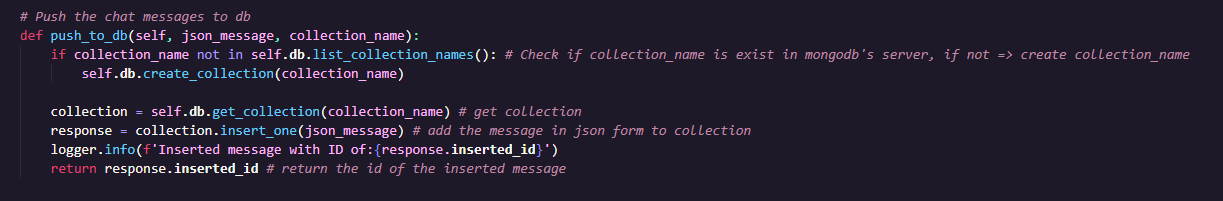

    - __start_session(self): Tạo và kết nối các tiến trình hoạt động với nhau theo thứ tự như sau:
        1. Khởi động và kết nối Database.
        2. Khởi động hoặc tạo ra consumer topic của Kafka.
        3. Phân loại message nhận được từ consumer topic:
            - Nếu message là thông tin của video thì thêm dữ liệu trong message đó vào collection "info".
            - Nếu message là các tin nhắn chat trực tiếp thì thêm dữ liệu trong message đó vào collection "live"

            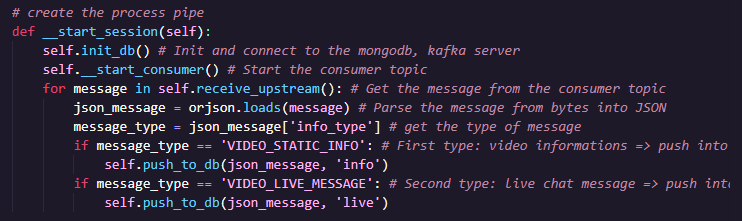


